### This is an EDA for Recomender System using small MovieLens Dataset

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
seed = 0
np.random.seed(seed)

## Load movies data

In [2]:
df_movies = pd.read_csv("data/ml-latest-small/movies.csv")
df_movies.columns = ["MovieID", "Title", "Genres"]
df_movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Load ratings

In [3]:
df_ratings = pd.read_csv("data/ml-latest-small/ratings.csv")
df_ratings.columns = ["UserID", "MovieID", "Rating", "Timestamp"]
df_ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Timestamp to Datetime

In [4]:
df_ratings["Timestamp"] = pd.to_datetime(df_ratings['Timestamp'], unit='s')
df_ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51


In [5]:
df = df_movies.merge(df_ratings, left_on='MovieID', right_on='MovieID')
df = df[["MovieID", "Title", "Genres", "UserID", "Timestamp", "Rating"]] 
df.head()

,MovieID,Title,Genres,UserID,Timestamp,Rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,2000-07-30 18:45:03,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,1996-11-08 06:36:02,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,2005-01-25 06:52:26,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2017-11-13 12:59:30,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,2011-05-18 05:28:03,4.5


## Distribution Ratings

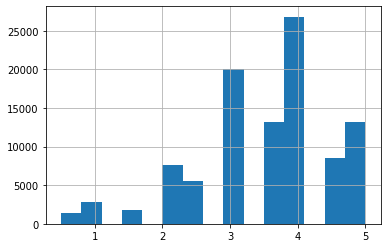

In [6]:
hist = df["Rating"].hist(bins=15)

## Unique values Users and Film

In [7]:
df["Title"] = df["Title"].str.lower()
movies_uniq = df["Title"].unique()
print("Nombres des Film: ", len(movies_uniq))

users_uniq = df["UserID"].unique()
print("Nombres d'utilisateurs: ", len(users_uniq))

Nombres des Film:  9719
Nombres d'utilisateurs:  610


## The most representative Genres of film

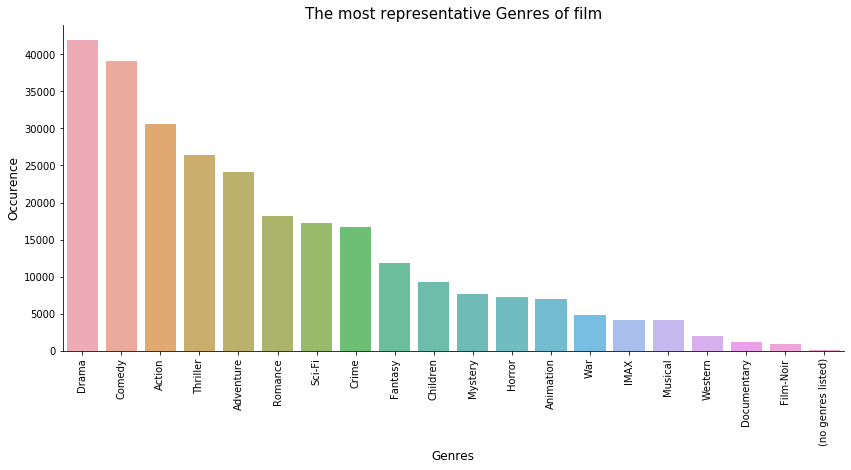

In [52]:
# get the frequency between of Genres
freqGenres = df["Genres"].str.split("|", expand=True).stack().value_counts()

plt.figure(figsize = (14,6))

g = sns.barplot(freqGenres.index.to_list(), freqGenres.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.title('The most representative Genres of film', fontsize=15) 
plt.ylabel("Occurence", fontsize=12)
plt.xlabel("Genres", fontsize=12)
sns.despine()

## Most Rating-Genres

In [69]:
data = pd.concat([df["Rating"], df["Genres"].str.get_dummies(sep='|')], axis=1)
data.head()

,Rating,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,4.0,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.5,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.5,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.5,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
def rating_genres(df):
    """
    Input: dataFrame with Genres and Rating
    Output: Mean, Median, Min, Max of Rating-Genres
    """
    columns = df.columns
    
    rat = pd.DataFrame()
    
    for col in columns[1:]:
        
        genres = df[["Rating", col]].loc[df[col]==1]

        rat_genre = { 
                "Genres": col,
                "Median Rating": genres["Rating"].median(),
                "Mean Rating": np.round(genres["Rating"].mean(), 3),
                "Max Rating": genres["Rating"].max(),
                "Min Rating": genres["Rating"].min()
               }
                             
        rat = rat.append(rat_genre, ignore_index=True)

    rat = rat.sort_values(by="Median Rating", ascending=False)
                             
    return rat

rat_genre = rating_genres(data)
rat_genre.head(10)

,Genres,Max Rating,Mean Rating,Median Rating,Min Rating
10,Film-Noir,5.0,3.920,4.0,0.5
7,Documentary,5.0,3.798,4.0,0.5
18,War,5.0,3.808,4.0,0.5
14,Mystery,5.0,3.632,4.0,0.5
12,IMAX,5.0,3.618,4.0,0.5
8,Drama,5.0,3.656,4.0,0.5
19,Western,5.0,3.584,4.0,0.5
6,Crime,5.0,3.658,4.0,0.5
3,Animation,5.0,3.630,4.0,0.5
5,Comedy,5.0,3.385,3.5,0.5


## Movie with the best rating

In [149]:
d = {'Title':'Title', 'Rating':'MedRating','UserID':'NbrUserRating'}
bRating = df[["MovieID", "Rating", "Title", "UserID"]].groupby("MovieID").agg({'Title':'first', 'Rating':'median', 'UserID':'count'}).rename(columns= d)

# exlude the Film with NbrUserRating less than mean
bRating = bRating.loc[bRating["NbrUserRating"]> bRating["NbrUserRating"].mean()]
bRating = bRating.sort_values(by="MedRating", ascending=False)

#bR.shape
bRating.head()

,Title,MedRating,NbrUserRating
MovieID,,,
3451,guess who's coming to dinner (1967),5.00,11
1041,secrets & lies (1996),5.00,11
1178,paths of glory (1957),4.75,12
1104,"streetcar named desire, a (1951)",4.75,20
58559,"dark knight, the (2008)",4.50,149
